In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/training-word-embeddings/royal_data.txt


## Load Data

In [2]:
import nltk
from nltk.corpus import stopwords
import numpy as np

In [3]:
file = open('/kaggle/input/training-word-embeddings/royal_data.txt','r')
royal_data = file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [4]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n','')

print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


## Remove stopwords and Tokenize

In [5]:
filter_data =[]
for sent in royal_data:
    temp = []
    for word in sent.split():
        if word not in stopwords.words('english'):
            temp.append(word)
    filter_data.append(temp)
print(filter_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


## Bigrams

In [6]:
bigrams = []
for word_list in filter_data:
    for i in range(len(word_list) - 1):
        for j in range(i+1, len(word_list)):
            bigrams.append([word_list[i],word_list[j]])
            bigrams.append([word_list[j],word_list[i]])
print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


## Vocab

In [7]:
all_words=[]
for sent in filter_data:
    all_words.extend(sent)
print(all_words)

['future', 'king', 'prince', 'daughter', 'princess', 'son', 'prince', 'man', 'king', 'woman', 'queen', 'princess', 'queen', 'prince', 'strong', 'man', 'princess', 'beautiful', 'woman', 'prince', 'boy', 'prince', 'king', 'boy', 'man']


In [8]:
all_words = list(set(all_words))
# all_words.sort()
print(all_words)

['boy', 'prince', 'princess', 'woman', 'beautiful', 'queen', 'daughter', 'strong', 'man', 'son', 'king', 'future']


## One hot encoding

In [9]:
word_dict = {}
counter = 0
for word in all_words:
    word_dict[word] = counter
    counter +=1
print(word_dict)

{'boy': 0, 'prince': 1, 'princess': 2, 'woman': 3, 'beautiful': 4, 'queen': 5, 'daughter': 6, 'strong': 7, 'man': 8, 'son': 9, 'king': 10, 'future': 11}


In [10]:
onehot_data = np.zeros((len(all_words),len(all_words)))
for i in range(len(all_words)):
    onehot_data[i][i] = 1
# print(onehot_data)

onehot_dict = {}

for i in range(len(all_words)):
    onehot_dict[all_words[i]] = onehot_data[i]

for word in onehot_dict:
    print(word, ":",onehot_dict[word])

boy : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
prince : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
princess : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
woman : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
beautiful : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
king : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
future : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
X = np.array(X)
Y = np.array(Y)

## Model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()

vocab_size = len(onehot_data[0])
embed_size = 2

model.add(Input(shape = (vocab_size,)))
model.add(Dense(embed_size, activation='linear'))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

2025-05-24 23:47:56.806367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748130477.092996      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748130477.175174      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-24 23:48:13.574283: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.fit(X,Y,epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.5245
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5191
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5153
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.5190
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5122
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5117
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5139
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.5057
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5103
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5142
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.5034
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5039
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5008
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5082
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.5028
Epoc

In [14]:
weights = model.get_weights()[0]

word_embedding = {}
for word in all_words:
    word_embedding[word] = weights[word_dict[word]]
# print(word_embedding)

for word in all_words:
    print(word, ":",word_embedding[word])

boy : [ 0.7017507  -0.03454233]
prince : [0.76225805 1.1650275 ]
princess : [-0.5252269  -0.71150374]
woman : [-0.66511935 -1.1143371 ]
beautiful : [-0.48017287 -1.2209941 ]
queen : [-0.45606422 -0.84104306]
daughter : [-0.8422581 -1.0464156]
strong : [ 0.70495844 -0.1274057 ]
man : [0.22010194 0.9969726 ]
son : [-0.35796213  0.977066  ]
king : [0.69493735 0.27336124]
future : [-0.19904931  1.0950664 ]


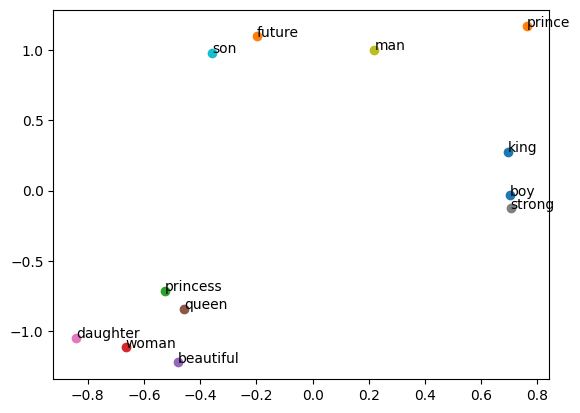

In [15]:
import matplotlib.pyplot as plt

for word in all_words:
    coordinates = word_embedding[word]
    plt.scatter(coordinates[0],coordinates[1])
    plt.annotate(word, (coordinates[0],coordinates[1]))